# Network Model - Analysis

In [22]:
# Libraries
import numpy as np
import pandas as pd
import igraph as ig
import networkx as nx
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from auxiliar_funcs import *

### Load Data

In [16]:
# LOAD DATA
url_file = "../00-Data/train.csv"
df_data = pd.read_csv(url_file)
print("Data loaded!")
print(df_data.info())

# User attributes
user_attrs = df_data.columns[2:]

# Number of users
n_users = len(df_data[user_attrs].drop_duplicates())
n_rsrcs = len(df_data.RESOURCE.drop_duplicates())
print("|U|: ", n_users) # Unique users
print("|R|: ", n_rsrcs) # Unique resources

# Create an index for every users
user_dict = {}
for u_idx, u_attr in enumerate(df_data[user_attrs].drop_duplicates().values):
    idx = "999" + str(u_idx) + "999"
    user_dict[int(idx)] = list(u_attr)
print("|U| :", len(user_dict))

# Create a new column to add in a DF
list_usr_idx = []
key_list = list(user_dict.keys()) # list out keys and values separately
val_list = list(user_dict.values())
for log in df_data[user_attrs].values:
    key_idx = val_list.index(list(log))
    list_usr_idx.append(key_list[key_idx])
print("|L'| :", len(list_usr_idx), " = |L| :", len(df_data))
df_data["USERID"] = list_usr_idx

print()
df_pos_entries = df_data[df_data.ACTION==1]
df_neg_entries = df_data[df_data.ACTION==0]
print('Num positive entries:',len(df_pos_entries), 
    "{:.4}%".format((len(df_pos_entries)/len(df_data))*100))
print('Num negative entries:',len(df_neg_entries),
    "{:.4}%".format((len(df_neg_entries)/len(df_data))*100))

##### ***** Cross-Validation Configuration ***** #####
k = 10
test_size = 0.2
kfold = StratifiedShuffleSplit(n_splits=k, test_size=test_size, random_state=1)

data_partition = kfold.split(df_data, df_data.ACTION)
data_corpus = [] # Lista donde se almacenan los k fols

for train_data, test_data in data_partition:        
    X_train, X_test = df_data.iloc[train_data], df_data.iloc[test_data]
    data_corpus.append([X_train, X_test])

print("Done!")

Data loaded!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32769 entries, 0 to 32768
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   ACTION            32769 non-null  int64
 1   RESOURCE          32769 non-null  int64
 2   MGR_ID            32769 non-null  int64
 3   ROLE_ROLLUP_1     32769 non-null  int64
 4   ROLE_ROLLUP_2     32769 non-null  int64
 5   ROLE_DEPTNAME     32769 non-null  int64
 6   ROLE_TITLE        32769 non-null  int64
 7   ROLE_FAMILY_DESC  32769 non-null  int64
 8   ROLE_FAMILY       32769 non-null  int64
 9   ROLE_CODE         32769 non-null  int64
dtypes: int64(10)
memory usage: 2.5 MB
None
|U|:  9561
|R|:  7518
|U| : 9561
|L'| : 32769  = |L| : 32769

Num positive entries: 30872 94.21%
Num negative entries: 1897 5.789%
Done!


### Data Pre-processing

In [17]:
##### ***** Control Variables ***** #####
id_kfold = 0
task4 = False
#########################################

df_train_k, df_test_k = data_corpus[id_kfold][0], data_corpus[id_kfold][1]
print("# Train access request =", len(df_train_k), 
      " %: {:.2f}".format((len(df_train_k)/(len(df_train_k)+len(df_test_k)))*100))
print("# Test access request =", len(df_test_k),
      " %: {:.2f}".format((len(df_test_k)/(len(df_train_k)+len(df_test_k)))*100))
print("# Total =", len(df_train_k)+len(df_test_k))
print()

##### ***** Task 1: Null and uknwokn values ***** #####
print("TASK 1: Done!"); print() # NA


##### ***** TASK 2: convert continuous values to categorical values ***** #####
print("TASK 2: Done!"); print() # NA 

##### ***** TASK 3: Drop duplicates access requests ***** #####
print("TASK 3: Drop duplicates access requests")
df_train_k_pos = df_train_k[df_train_k.ACTION==1]   # Train Pos
df_train_k_neg = df_train_k[df_train_k.ACTION==0]   # Train Neg
df_test_k_pos = df_test_k[df_test_k.ACTION==1]      # Test Pos
df_test_k_neg = df_test_k[df_test_k.ACTION==0]      # Test Neg
df_train_k_pos = df_train_k_pos[df_train_k_pos.columns[1:]].drop_duplicates()
df_train_k_neg = df_train_k_neg[df_train_k_neg.columns[1:]].drop_duplicates()
df_test_k_pos = df_test_k_pos[df_test_k_pos.columns[1:]].drop_duplicates()
df_test_k_neg = df_test_k_neg[df_test_k_neg.columns[1:]].drop_duplicates()
print()

print("# Solicitudes Train (+):", len(df_train_k_pos), " %: {:.2f}".format(
      (len(df_train_k_pos)/len(df_train_k))*100))
print("# Solicitudes Train (-):", len(df_train_k_neg), " %: {:.2f}".format(
      (len(df_train_k_neg)/len(df_train_k))*100))
print("# Solicitudes Test (+):", len(df_test_k_pos), " %: {:.2f}".format(
      (len(df_test_k_pos)/len(df_test_k))*100))
print("# Solicitudes Test (-):", len(df_test_k_neg), " %: {:.2f}".format(
      (len(df_test_k_neg)/len(df_test_k))*100))
print("# Train Users (+): ", len(df_train_k_pos.USERID.drop_duplicates()))
print("# Train Resrc (+): ", len(df_train_k_pos.RESOURCE.drop_duplicates()))
print("# Train Users (-): ", len(df_train_k_neg.USERID.drop_duplicates()))
print("# Train Resrc (-): ", len(df_train_k_neg.RESOURCE.drop_duplicates()))
print("# Test Users (+): ", len(df_test_k_pos.USERID.drop_duplicates()))
print("# Test Resrc (+): ", len(df_test_k_pos.RESOURCE.drop_duplicates()))
print("# Test Users (-): ", len(df_test_k_neg.USERID.drop_duplicates()))
print("# Test Resrc (-): ", len(df_test_k_neg.RESOURCE.drop_duplicates())); print()

if task4:
    # Filter resources
      n1 = 0
      n2 = 149
      top_list = df_train_k_pos.RESOURCE.value_counts()[:len(df_train_k_pos.RESOURCE.drop_duplicates())].index.tolist()
      # Filter the interval between n1 and n2
      top_list = top_list[n1:n2+1]
      print('#Filtered resources:', len(top_list))
      boolean_series = df_train_k_pos.RESOURCE.isin(top_list)
      df_train_k_pos = df_train_k_pos[boolean_series]
      bolean_series = df_train_k_neg.RESOURCE.isin(top_list)
      df_train_k_neg = df_train_k_neg[bolean_series]
      print("Done!")
      

# Train access request = 26215  %: 80.00
# Test access request = 6554  %: 20.00
# Total = 32769

TASK 1: Done!

TASK 2: Done!

TASK 3: Drop duplicates access requests

# Solicitudes Train (+): 24697  %: 94.21
# Solicitudes Train (-): 1518  %: 5.79
# Solicitudes Test (+): 6175  %: 94.22
# Solicitudes Test (-): 379  %: 5.78
# Train Users (+):  8576
# Train Resrc (+):  6414
# Train Users (-):  830
# Train Resrc (-):  950
# Test Users (+):  4087
# Test Resrc (+):  2748
# Test Users (-):  301
# Test Resrc (-):  316



### Network Modelling

In [20]:
def build_network_model(data, usr_id_name, res_id_name, file_path=None):
    """
    Builds the Access Requests Bipartite Network from Access log.

    Args:
        data (pandas dataframe): The Access Log.
        usr_id_name (str): The name of the ID users column in the Access Log
        res_id_name (str): The name of the ID resources column in the Access Log
    
    Returns:
        Graph (iGraph): The Access Requests Bipartite Network.

    Raises:
        TypeError: If a network is not Bipartite.
    """
    
    list_of_edges = []
    bi_network = nx.Graph() # NetworkX Graph object

    for usr_idx, rsr_idx in data[[usr_id_name, res_id_name]].values:
        list_of_edges.append((int(usr_idx), int(rsr_idx))) # Tuple of edges
    bi_network.add_edges_from(list_of_edges) # Build Network with edges

    # Change networkX object to iGraph object
    bi_network = ig.Graph.from_networkx(bi_network)
    bi_network.vs['name'] = bi_network.vs["_nx_name"] # Clean name column
    del bi_network.vs["_nx_name"] # Remove uncleaned name column

    print(bi_network.summary())
    print(bi_network.vs())

    if not bi_network.is_bipartite():
        raise TypeError("The ARBN is not bipartite")

    ### Add type of node (user or resource)
    list_of_resources_in_data = list(data[res_id_name])
    list_node_type = []
    for node in bi_network.vs():
        if node['name'] in list_of_resources_in_data:
            list_node_type.append(1) # A resource
        else:
            list_node_type.append(0) # An user
    bi_network.vs["typen"] = list_node_type
    ### End node type

    if not file_path == None: # Create a file
        ig.write(bi_network, file_path)

    print("ARBN builded!")
    print(bi_network.summary())
    print("|U-Nodes| =", len(bi_network.vs.select(typen=0)))
    print("|R-Nodes| =", len(bi_network.vs.select(typen=1)))

    return bi_network
    

In [21]:
bip_network = build_network_model(df_train_k_pos, 'USERID', 'RESOURCE')

IGRAPH UN-- 14990 24697 -- 
+ attr: name (v)
ARBN builded!
IGRAPH UN-- 14990 24697 -- 
+ attr: name (v), typen (v)
|U-Nodes| = 8576
|R-Nodes| = 6414


### User network

In [127]:
def get_edge_weight(i_node, j_node):
    """
    Compute the weight of an edge between i and j nodes.

    Args:
        i_node (networkX node): i node.
        j_node (networkX node): j node.
    
    Returns:
        weight (float): The weight between nodes.

    Raises:
        TypeError: if there are not an intersection
    """
    neighs_i = set(i_node.neighbors())
    neighs_j = set(j_node.neighbors())

    insersection_neighbors = neighs_i.intersection(neighs_j)
    
    weight = (len(insersection_neighbors)*len(insersection_neighbors)) / (len(neighs_i)*len(neighs_j))

    return weight


def bipartite_projection(biparte_network, node_type=0):
    """
    Generate a monopartite network from bipartite network.

    Args:
        bipartite_network (igraph Graph): The bipartie network.
        node_type (int): The set of nodes of the monopartite network.

    Returns:
        Graph (iGraph): The monopartite (projected) network.

    Raises:
        Some
    """

    #Check if the bipartite network is a bipartite network:
    if not biparte_network.is_bipartite():
        raise TypeError("The ARBN is not bipartite")

    # networkX object (more easy to buil)
    g = nx.Graph()

    # All opposite node set
    opposite_nodes = biparte_network.vs.select(typen=1)

    # Check for every node the same type
    for X_node in opposite_nodes:
        # Select all neighbors of the X_node
        neighbordhood = X_node.neighbors()

        for Y_node_i in neighbordhood:
            for Y_node_j in neighbordhood:
                # Ceck if both nodes are the same
                if Y_node_i['name'] != Y_node_j['name']:
                    # If there is no an edge generate
                    if not g.has_edge(Y_node_i['name'], Y_node_j['name']):
                        weight_ = get_edge_weight(Y_node_i, Y_node_j)
                        #print("Peso: ", Y_node_i['name'], "-", Y_node_j['name'], " => ", weight_)
                        g.add_edge(Y_node_i["name"], Y_node_j["name"],
                                   weight=weight_)                                 

    # Convert from networkX graph to igraph graph
    g = ig.Graph.from_networkx(g)
    g.vs["name"] = g.vs["_nx_name"]
    del g.vs["_nx_name"]
    
    return g


In [128]:
user_network = bipartite_projection(bip_network, 0)
print(user_network.summary())
ig.write(user_network, "graphs/amz_user_network.gml")

IGRAPH UNW- 8250 772907 -- 
+ attr: name (v), weight (e)


### Network Analysis

In [134]:
density = user_network.density()
print("Density:", density)

avg_degree = sum(user_network.degree()) / user_network.vcount()
print("Avg. degree", avg_degree)


Density: 0.022714437379002778
Avg. degree 187.37139393939393


TypeError: function missing required argument 'n' (pos 1)

P6: Scale-free distribution p(k) = ∼k^{−α}.


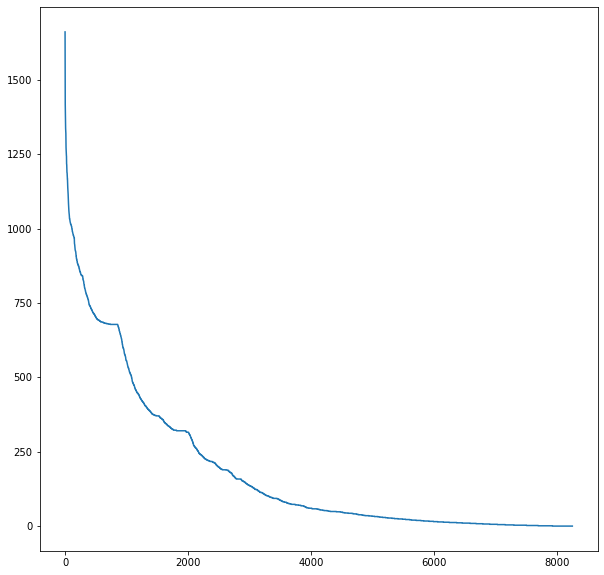

In [173]:
##### P6: Scale-free distribution p(k) = ∼k−α. #####
print("P6: Scale-free distribution p(k) = ∼k^{−α}.")
#distri_grados = [i/user_network.vcount() for i in user_network.degree()]
distri_grados = [i for i in user_network.degree()]
plt.figure(figsize=(10,10))
plt.plot(sorted(distri_grados,reverse=True))
#x1, y1 = [100, 700], [0.13, 0.015]
#x2, y2 = [1, 231], [3, 2]
#plt.plot(x1, y1, marker = 'o')
#plt.yscale("log")
#plt.xscale("log")
plt.show()
print()

P6: Scale-free distribution p(k) = ∼k^{−α}.


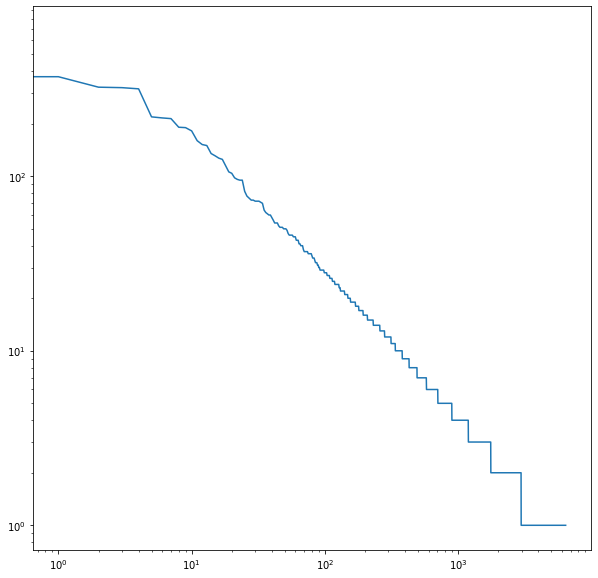

In [166]:
##### P6: Scale-free distribution p(k) = ∼k−α. #####
print("P6: Scale-free distribution p(k) = ∼k^{−α}.")
distri_grados = df_train_k_pos.RESOURCE.value_counts()
plt.figure(figsize=(10,10))
plt.plot(sorted(distri_grados,reverse=True))
#x1, y1 = [100, 700], [0.13, 0.015]
#x2, y2 = [1, 231], [3, 2]
#plt.plot(x1, y1, marker = 'o')
plt.yscale("log")
plt.xscale("log")
plt.show()
print()

(array([  10.,   22.,   61.,  110.,  278.,  497.,  738., 1006., 1262.,
        1416., 1329., 1170.,  848.,  595.,  346.,  180.,   77.,   39.,
          12.,    4.]),
 array([-342.  , -306.85, -271.7 , -236.55, -201.4 , -166.25, -131.1 ,
         -95.95,  -60.8 ,  -25.65,    9.5 ,   44.65,   79.8 ,  114.95,
         150.1 ,  185.25,  220.4 ,  255.55,  290.7 ,  325.85,  361.  ]),
 <BarContainer object of 20 artists>)

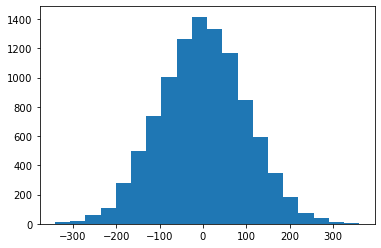

In [181]:
from scipy.stats import norm

# Generate 10000 normal random integers with specified mean (loc) and std (scale).
draw = norm.ppf(np.random.random(10000), loc=0, scale=100).astype(int)
plt.hist(draw, bins=20)

P6: Scale-free distribution p(k) = ∼k^{−α}.


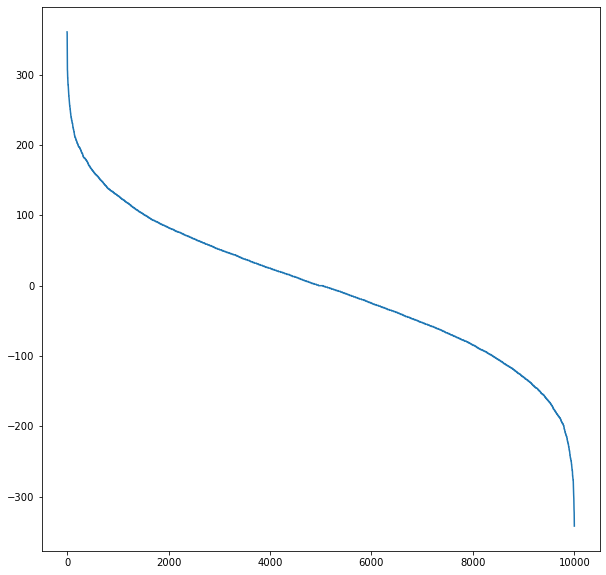

In [184]:
##### P6: Scale-free distribution p(k) = ∼k−α. #####
print("P6: Scale-free distribution p(k) = ∼k^{−α}.")
distri_grados = df_train_k_pos.RESOURCE.value_counts()
plt.figure(figsize=(10,10))
plt.plot(sorted(sorted(draw),reverse=True))
#x1, y1 = [100, 700], [0.13, 0.015]
#x2, y2 = [1, 231], [3, 2]
#plt.plot(x1, y1, marker = 'o')
#plt.yscale("log")
#plt.xscale("log")
plt.show()
print()